In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt 

In [2]:
#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

In [14]:
def plot_Lat_LT_average_line_from_netcdf(nc_filename1, nc_filename2):

    ds1 = xr.open_dataset(nc_filename1)
    ds2 = xr.open_dataset(nc_filename2)
    
    seasonal_data1 = {season: ds1[season].values for season in ds1.data_vars}
    seasonal_data2 = {season: ds2[season].values for season in ds2.data_vars}

    season_names = list(seasonal_data1.keys())

    avg_data1 = {season: np.mean(data, axis=0) for season, data in seasonal_data1.items()}
    avg_data2 = {season: np.mean(data, axis=0) for season, data in seasonal_data2.items()}

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes = axes.flatten()

    for i, (season, avg_values1) in enumerate(avg_data1.items()):
        ax = axes[i]

        ax.plot(timeplot, avg_values1, label=f"SMax", 
                color='red', linewidth=2, linestyle='-')

        ax.plot(timeplot, avg_data2[season], label=f"Climate Change", 
                color='blue', linewidth=2, linestyle='-')
        
        ax.set_title(f"{season}", fontsize=12)
        ax.set_xlabel("Local Time / hrs", fontsize=10)
        ax.set_ylabel("Occurance Frequency (%)", fontsize=10)
        
        xticks_waccm = np.linspace(0, 24, 13)
        ax.set_xticks(xticks_waccm)
        ax.set_xticklabels(xticks_waccm.astype(int))
        
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(title="Run", fontsize=8)

    
    plt.suptitle("Comparison of Average occurace rates", fontsize=16)
    plt.tight_layout()
    plt.show()

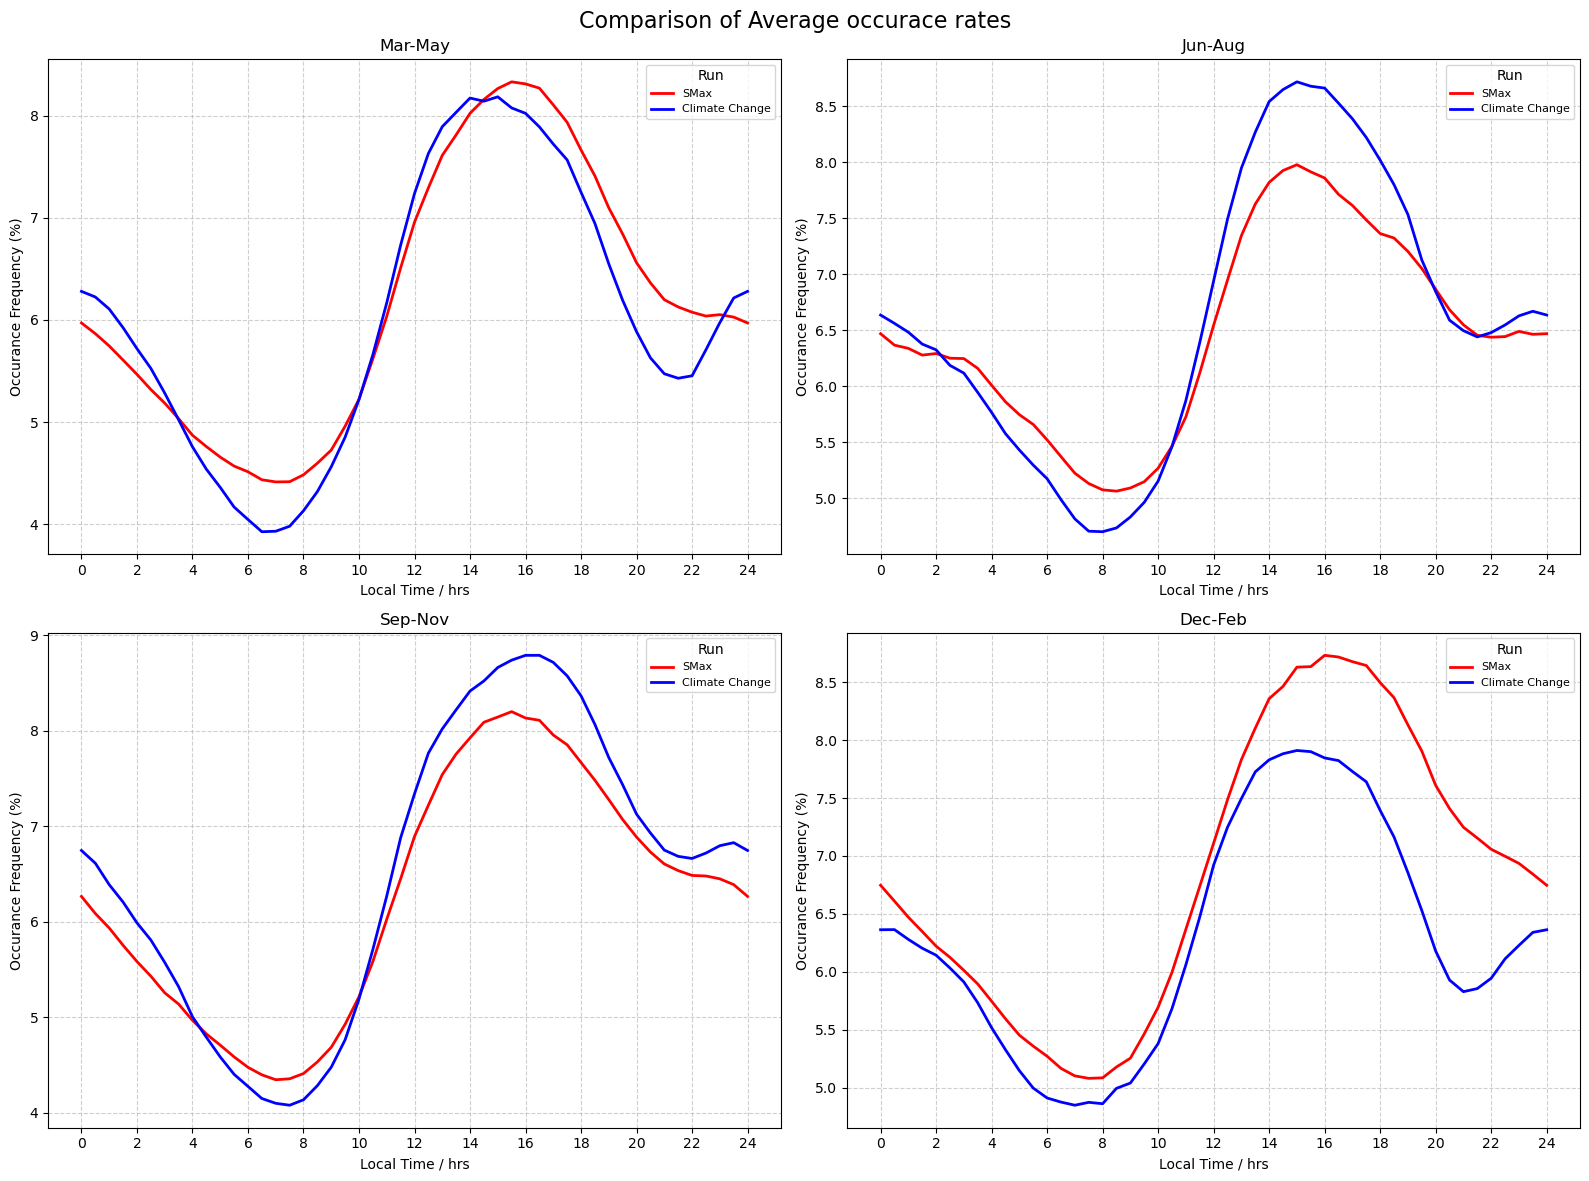

In [15]:
plot_Lat_LT_average_line_from_netcdf("Nc_Files/seasonal_occurrence_frequency_LT_SMax.nc", "Nc_Files/seasonal_occurrence_frequency_LT_cli_cha.nc")

In [6]:
def plot_Lat_LT_average_line_from_netcdf(nc_filename1, nc_filename2):
    ds1 = xr.open_dataset(nc_filename1)
    ds2 = xr.open_dataset(nc_filename2)
    
    seasonal_data1 = {season: ds1[season].values for season in ds1.data_vars}
    seasonal_data2 = {season: ds2[season].values for season in ds2.data_vars}
    season_names = list(seasonal_data1.keys())
    avg_data1 = {season: np.mean(data, axis=0) for season, data in seasonal_data1.items()}
    avg_data2 = {season: np.mean(data, axis=0) for season, data in seasonal_data2.items()}
    
    # Calculate the difference between datasets
    diff_data = {season: avg_data2[season] - avg_data1[season] for season in avg_data1.keys()}
    
    # First plot: Original comparison
    fig1, axes1 = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes1 = axes1.flatten()
    for i, (season, avg_values1) in enumerate(avg_data1.items()):
        ax = axes1[i]
        ax.plot(timeplot, avg_values1, label=f"SMax", 
                color='red', linewidth=2, linestyle='-')
        ax.plot(timeplot, avg_data2[season], label=f"Climate Change", 
                color='blue', linewidth=2, linestyle='-')
        
        ax.set_title(f"{season}", fontsize=12)
        ax.set_xlabel("Local Time / hrs", fontsize=10)
        ax.set_ylabel("Occurrence Frequency (%)", fontsize=10)
        
        xticks_waccm = np.linspace(0, 24, 13)
        ax.set_xticks(xticks_waccm)
        ax.set_xticklabels(xticks_waccm.astype(int))
        
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(title="Run", fontsize=8)
    
    plt.suptitle("Comparison of Average occurrence rates", fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Second plot: Difference plot
    fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes2 = axes2.flatten()
    for i, (season, diff_values) in enumerate(diff_data.items()):
        ax = axes2[i]
        ax.plot(timeplot, diff_values, 
                color='purple', linewidth=2, linestyle='-')
        
        ax.set_title(f"{season}", fontsize=12)
        ax.set_xlabel("Local Time / hrs", fontsize=10)
        ax.set_ylabel("Difference in Occurrence Frequency (%)\n Climate Change - SMax", fontsize=10)
        
        xticks_waccm = np.linspace(0, 24, 13)
        ax.set_xticks(xticks_waccm)
        ax.set_xticklabels(xticks_waccm.astype(int))
        
        # Add a horizontal line at y=0 for reference
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        
        ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.suptitle("Difference in Average occurrence rates (SMax - Climate Change)", fontsize=16)
    plt.tight_layout()
    plt.show()

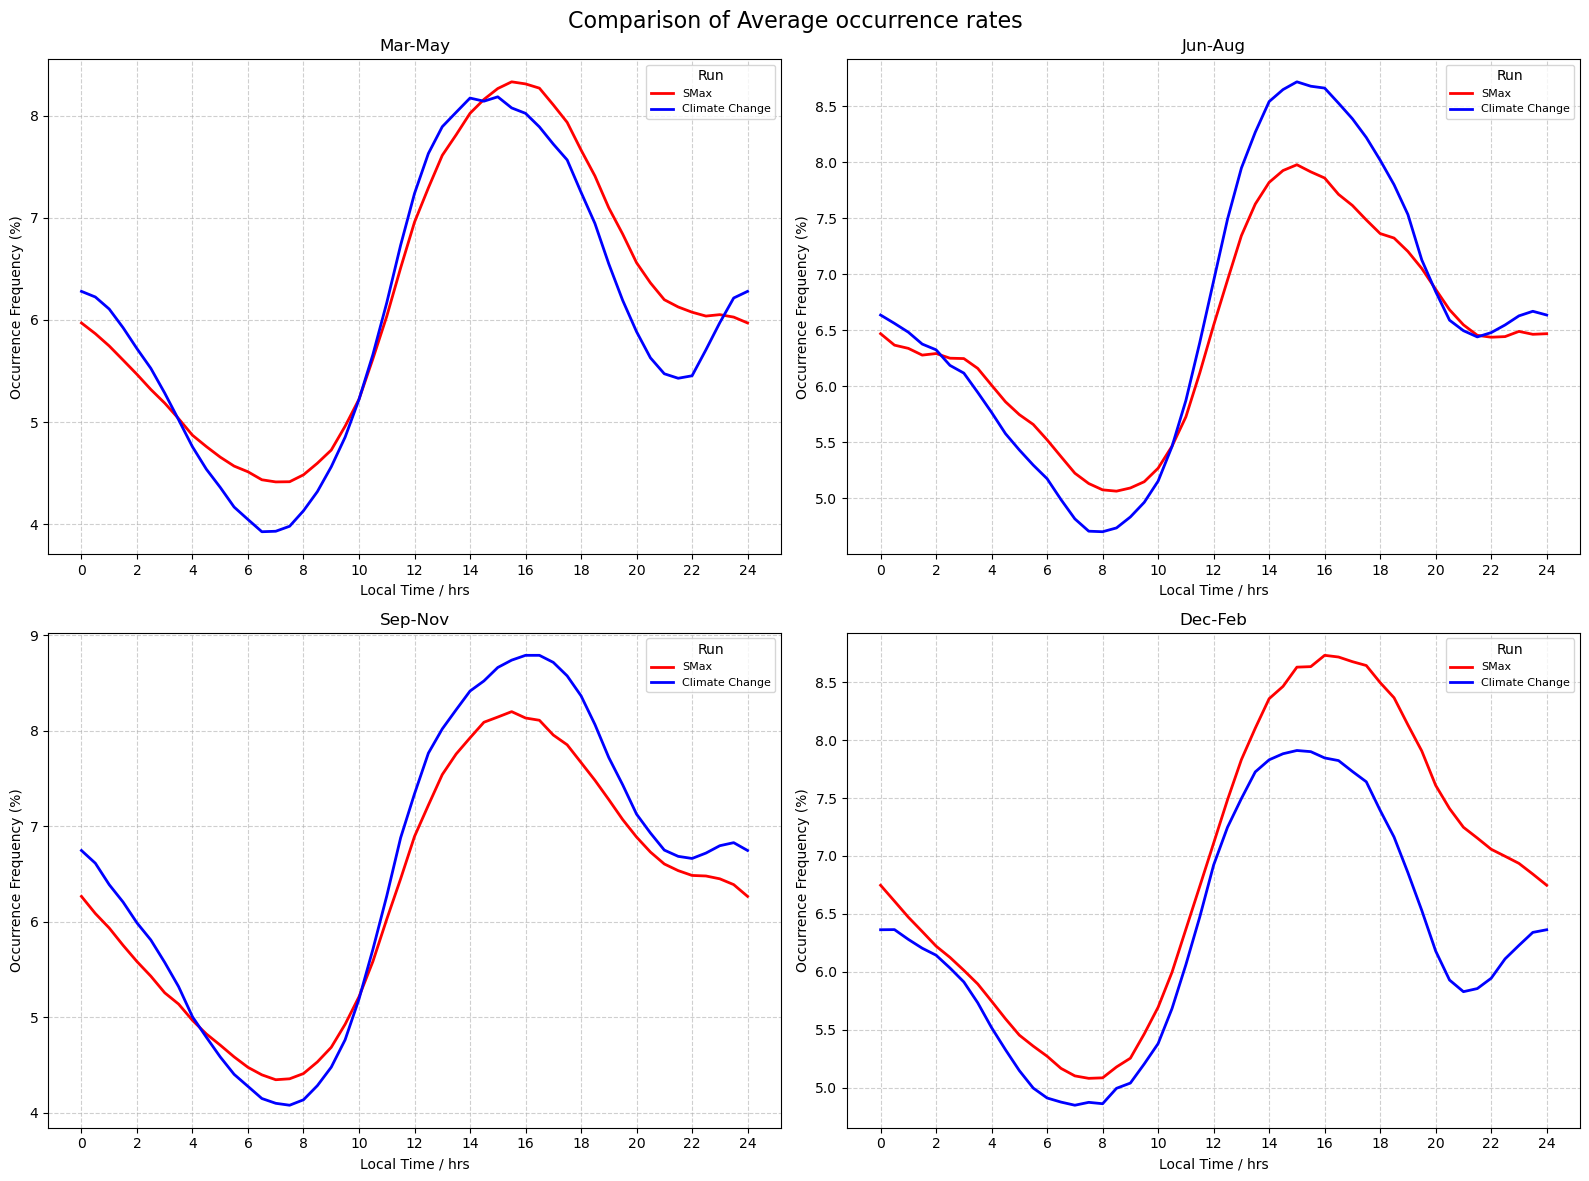

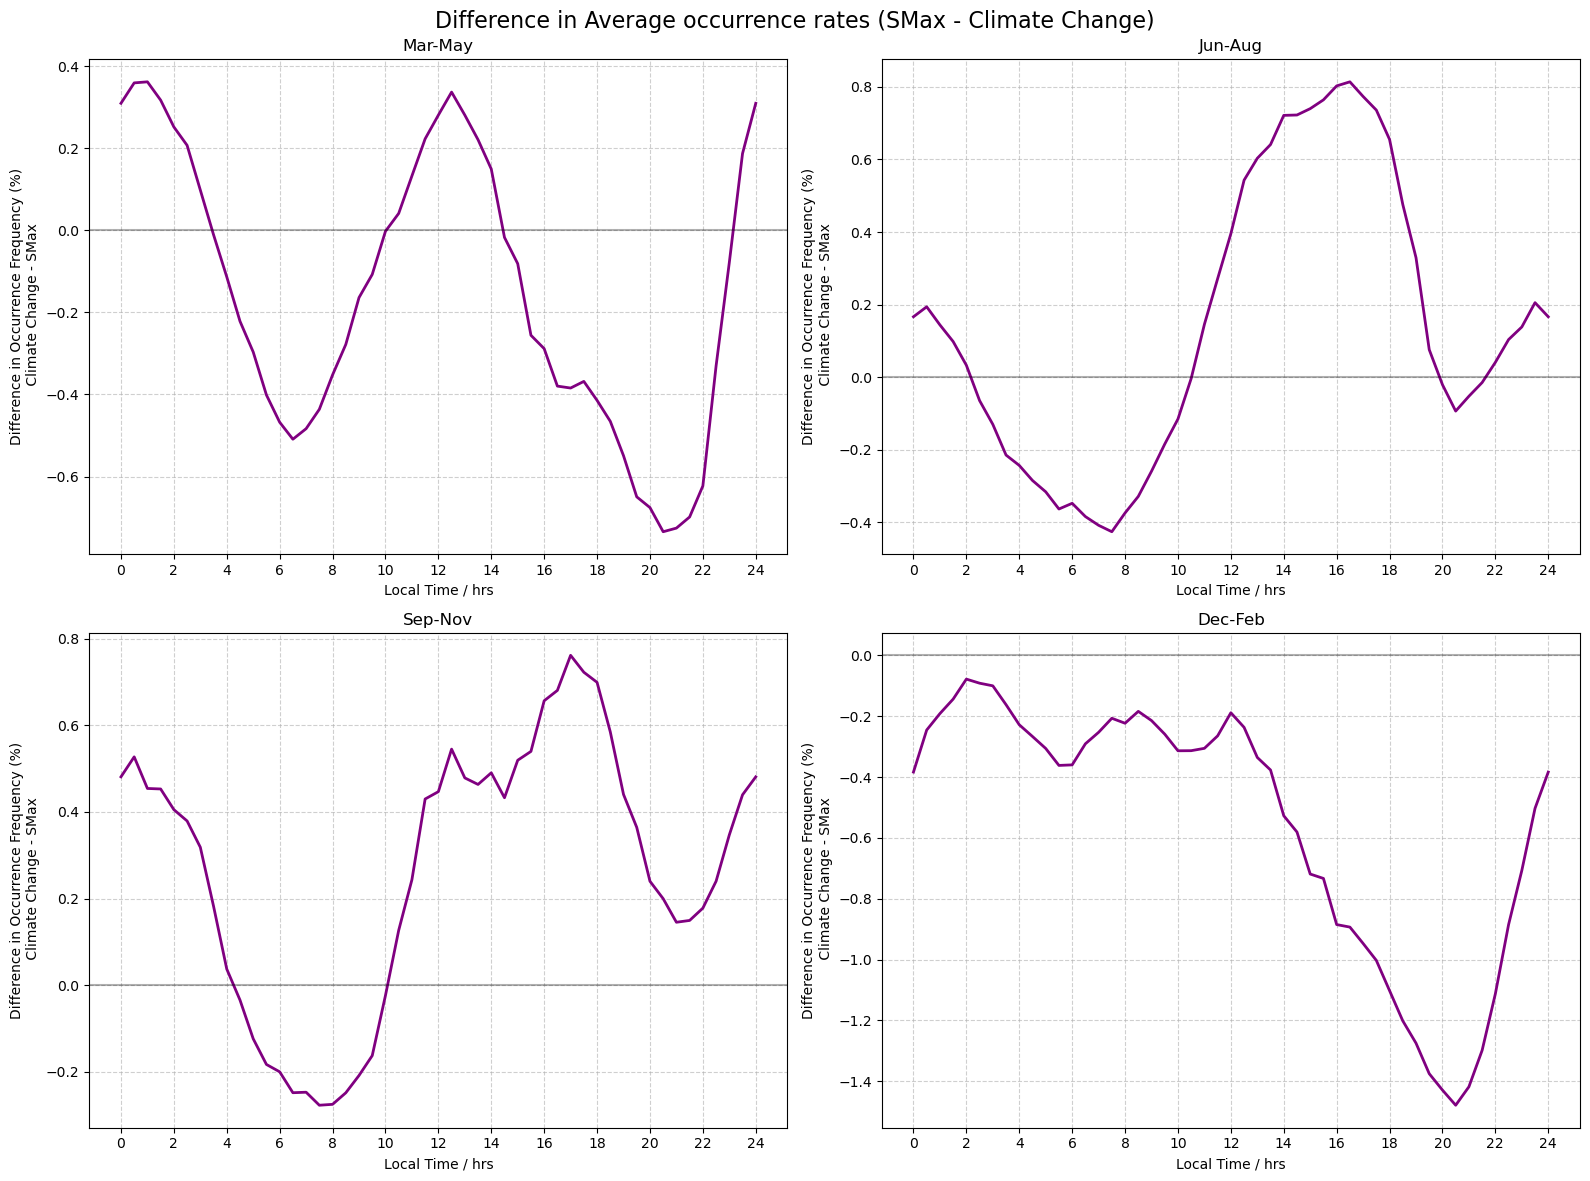

In [7]:
plot_Lat_LT_average_line_from_netcdf("Nc_Files/seasonal_occurrence_frequency_LT_SMax.nc", "Nc_Files/seasonal_occurrence_frequency_LT_cli_cha.nc")